## Wizeline DE Coding Challenge

As stated on this project's README, the objective of this notebook is to perform an exploratory analysis on the PROFECO dataset, a 20Gb csv file. The questions to answer are:

* How many commercial chains are monitored, and therefore, included in this database?
* What are the top 10 monitored products by State?
* Which is the commercial chain with the highest number of monitored products?
* Use the data to find an interesting fact.
* What are the lessons learned from this exercise?
* Can you identify other ways to approach this problem? Explain.

In [2]:
import pandas as pd

In [4]:
# read and explore zipped csv file
df = pd.read_csv("profeco.zip", compression='zip', header=0, sep=',', quotechar='"')

C:\Users\ridwa\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (5,13,14) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


## Explore Data

In [5]:
# check columns and rows information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62530715 entries, 0 to 62530714
Data columns (total 15 columns):
 #   Column           Dtype 
---  ------           ----- 
 0   producto         object
 1   presentacion     object
 2   marca            object
 3   categoria        object
 4   catalogo         object
 5   precio           object
 6   fechaRegistro    object
 7   cadenaComercial  object
 8   giro             object
 9   nombreComercial  object
 10  direccion        object
 11  estado           object
 12  municipio        object
 13  latitud          object
 14  longitud         object
dtypes: object(15)
memory usage: 7.0+ GB


In [6]:
# check first few rows
df.head()

,producto,presentacion,marca,categoria,catalogo,precio,fechaRegistro,cadenaComercial,giro,nombreComercial,direccion,estado,municipio,latitud,longitud
0,CUADERNO FORMA ITALIANA,96 HOJAS PASTA DURA. CUADRICULA CHICA,ESTRELLA,MATERIAL ESCOLAR,UTILES ESCOLARES,25.9,2011-05-18 00:00:00.000,ABASTECEDORA LUMEN,PAPELERIAS,ABASTECEDORA LUMEN SUCURSAL VILLA COAPA,CANNES No. 6 ESQ. CANAL DE MIRAMONTES,DISTRITO FEDERAL,TLALPAN,19.297,-99.1254
1,CRAYONES,CAJA 12 CERAS. JUMBO. C.B. 201423,CRAYOLA,MATERIAL ESCOLAR,UTILES ESCOLARES,27.5,2011-05-18 00:00:00.000,ABASTECEDORA LUMEN,PAPELERIAS,ABASTECEDORA LUMEN SUCURSAL VILLA COAPA,CANNES No. 6 ESQ. CANAL DE MIRAMONTES,DISTRITO FEDERAL,TLALPAN,19.297,-99.1254
2,CRAYONES,CAJA 12 CERAS. TAMANO REGULAR C.B. 201034,CRAYOLA,MATERIAL ESCOLAR,UTILES ESCOLARES,13.9,2011-05-18 00:00:00.000,ABASTECEDORA LUMEN,PAPELERIAS,ABASTECEDORA LUMEN SUCURSAL VILLA COAPA,CANNES No. 6 ESQ. CANAL DE MIRAMONTES,DISTRITO FEDERAL,TLALPAN,19.297,-99.1254
3,COLORES DE MADERA,CAJA 12 PIEZAS LARGO. TRIANGULAR. C.B. 640646,PINCELIN,MATERIAL ESCOLAR,UTILES ESCOLARES,46.9,2011-05-18 00:00:00.000,ABASTECEDORA LUMEN,PAPELERIAS,ABASTECEDORA LUMEN SUCURSAL VILLA COAPA,CANNES No. 6 ESQ. CANAL DE MIRAMONTES,DISTRITO FEDERAL,TLALPAN,19.297,-99.1254
4,COLOR LARGO,CAJA 36 PIEZAS. CON SACAPUNTAS. 68-4036,CRAYOLA,MATERIAL ESCOLAR,UTILES ESCOLARES,115,2011-05-18 00:00:00.000,ABASTECEDORA LUMEN,PAPELERIAS,ABASTECEDORA LUMEN SUCURSAL VILLA COAPA,CANNES No. 6 ESQ. CANAL DE MIRAMONTES,DISTRITO FEDERAL,TLALPAN,19.297,-99.1254


#### 1. How many commercial chains are monitored, and therefore, included in this database?

In [7]:
df.cadenaComercial.nunique() 

705

#### Answer: 705

#### 2. What are the top 10 monitored products by State?

In [8]:
#Getting the number of products by state
dfg = df.groupby(["estado", "producto"])['producto'].count().to_frame('count').reset_index()
dfg

,estado,producto,count
0,AGUASCALIENTES,A.S.COR,175
1,AGUASCALIENTES,ABILIFY,94
2,AGUASCALIENTES,ACARBOSA,145
3,AGUASCALIENTES,ACEITE,5838
4,AGUASCALIENTES,ACEITE DE OLIVA,2207
...,...,...,...
30356,ZACATECAS,ZWAN,2441
30357,ZACATECAS,ZWAN. PREMIUM,2997
30358,ZACATECAS,ZYLOPRIM,371
30359,ZACATECAS,ZYPREXA,532


In [15]:
#Getting top 10 products by state
dfg = dfg.groupby("estado").apply(lambda x: x.nlargest(10, 'count')).reset_index(drop=True) 
dfg

,estado,producto,count
0,AGUASCALIENTES,FUD,12005
1,AGUASCALIENTES,DETERGENTE P/ROPA,10188
2,AGUASCALIENTES,LECHE ULTRAPASTEURIZADA,9824
3,AGUASCALIENTES,SHAMPOO,9654
4,AGUASCALIENTES,REFRESCO,9481
...,...,...,...
316,ZACATECAS,SHAMPOO,15012
317,ZACATECAS,CHILES EN LATA,14866
318,ZACATECAS,COMPONENTES DE AUDIO,14799
319,ZACATECAS,REFRESCO,13925


In [34]:
#Add rank
dfg["rank"] = dfg.groupby("estado")["count"].rank("dense", ascending=False)
dfg

,estado,producto,count,rank
0,AGUASCALIENTES,FUD,12005,1.0
1,AGUASCALIENTES,DETERGENTE P/ROPA,10188,2.0
2,AGUASCALIENTES,LECHE ULTRAPASTEURIZADA,9824,3.0
3,AGUASCALIENTES,SHAMPOO,9654,4.0
4,AGUASCALIENTES,REFRESCO,9481,5.0
...,...,...,...,...
316,ZACATECAS,SHAMPOO,15012,7.0
317,ZACATECAS,CHILES EN LATA,14866,8.0
318,ZACATECAS,COMPONENTES DE AUDIO,14799,9.0
319,ZACATECAS,REFRESCO,13925,10.0


#### Answer: Please check https://raw.githubusercontent.com/ridbraheem/data-engineering-bootcamp/main/top10byState.csv

#### 3. Which is the commercial chain with the highest number of monitored products?

In [16]:
df.groupby("cadenaComercial")['producto'].nunique().to_frame('count').reset_index().sort_values(by='count', ascending=False)

,cadenaComercial,count
574,SORIANA,1059
683,WAL-MART,1051
301,MEGA COMERCIAL MEXICANA,1049
65,COMERCIAL MEXICANA,1036
58,CHEDRAUI,1026
...,...,...
241,LIBRERIA AMERICAN BOOK STORE,1
47,CALZADO TELLARI,1
222,LA BARATA,1
615,TENIS LA BARATA,1


#### Answer: Soriana

#### 4. Use the data to find an interesting fact.

For this, I would like to see the number of unique products tracked by year to see if there is a trend

In [25]:
dfx['newdate'] = pd.to_datetime(dfx['fechaRegistro'], errors='coerce')
dfx['year'] = dfx['newdate'].dt.year.astype('Int64')
dfy = dfx.groupby("year")['producto'].nunique().to_frame('count').reset_index().sort_values(by='year')
dfy

,year,count
0,2011,671
1,2012,933
2,2013,922
3,2014,794
4,2015,790
5,2016,752


There was a significant uptick in the number of unique products monitored from 2011 to 2012, but the trend has been going downward slowly after 2012

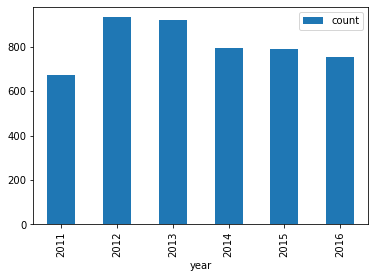

In [26]:
dfy.plot.bar(x='year', y='count')

#### 5. What are the lessons learned from this exercise?

I learned the best way to start an analysis is to ensure all columns in the dataframe are the right datatypes. An example of this is the 'fechaRegistro' column in the dataframe above. I assumed it was automatically a datetime, but I was wrong and I had to convert it to the right data type. Also, Pandas is obviously a very powerful framework for data analysis, but it performs poorly in terms of speed with large amount of data. 

#### 6. Can you identify other ways to approach this problem? Explain.

The best solution for data exploration is to take random samples in different chunk sizes to ensure we're covering as much, and explore or use a more analytical processing tool offered by cloud providers to improve performance and speed